<a href="https://colab.research.google.com/github/achmadbauravindah/ImageRecognition-CNN-MNISTFashionImagesDataset/blob/main/ImageRecognition_CNN_MNISTFashionImagesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist # mnist dataset
from matplotlib import pyplot as plt 

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
# Load Data MNIST Fashion from Keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
# Image label
image_labels = ["T-shirt/top" ,"Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_labels = len(image_labels)

In [ ]:
# Show sample image
def showTrainImage(n_images):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i])
        plt.xlabel(image_labels[y_train[i]]).set_color('white')
# Show sample image
def showTestImage(n_images):
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[i])
        plt.xlabel(image_labels[y_test[i]]).set_color('white')

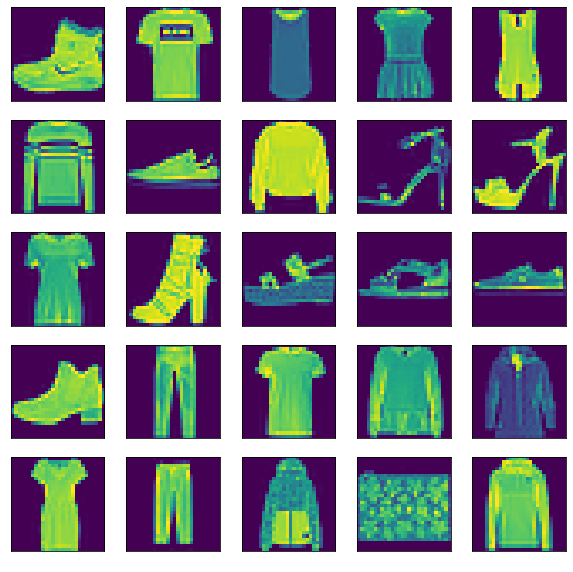

In [ ]:
showTrainImage(25) # Max 25 images

In [ ]:
def normalizePixel(pixel):
    pixel = pixel / 255.0
    return pixel

In [ ]:
X_train = normalizePixel(X_train)
X_test = normalizePixel(X_test)

In [ ]:
model = models.Sequential([
    layers.Input(shape = (28, 28)),
    layers.Flatten(),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = num_labels, activation = 'softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 109,810
Trainable params: 109,810
Non-trai

In [ ]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            )


In [ ]:
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5099 - accuracy: 0.8168
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3179 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2985 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.8973
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9013
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9042
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.244

In [ ]:
X_test[0].shape

(28, 28)

In [ ]:
y_test[0]

9

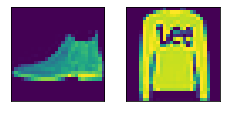

In [ ]:
showTestImage(2)

In [ ]:
model.predict([X_test[:1]])

array([[1.0658825e-05, 2.3800865e-06, 3.5563196e-06, 1.5601263e-06,
        5.4147404e-06, 3.5766713e-04, 1.9223467e-05, 1.5802626e-02,
        5.3107287e-06, 9.8379159e-01]], dtype=float32)